2025-05-09 16:05:12.259113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746806712.451928      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746806712.504499      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 5601 images belonging to 31 classes.
Found 1384 images belonging to 31 classes.
Classes: 31


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746806727.257803      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746806727.258446      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/35


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746806738.351019     106 service.cc:148] XLA service 0x7bd0f000cb60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746806738.352049     106 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746806738.352075     106 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746806739.130443     106 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/176 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.0547 - loss: 4.2075 

I0000 00:00:1746806748.328798     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


176/176 ━━━━━━━━━━━━━━━━━━━━ 81s 353ms/step - accuracy: 0.0634 - loss: 3.8097 - val_accuracy: 0.0368 - val_loss: 4.9711 - learning_rate: 0.0010
Epoch 2/35
176/176 ━━━━━━━━━━━━━━━━━━━━ 38s 211ms/step - accuracy: 0.1788 - loss: 2.8233 - val_accuracy: 0.0354 - val_loss: 10.8399 - learning_rate: 0.0010
Epoch 3/35
176/176 ━━━━━━━━━━━━━━━━━━━━ 40s 217ms/step - accuracy: 0.3198 - loss: 2.1753 - val_accuracy: 0.0665 - val_loss: 11.0723 - learning_rate: 0.0010
Epoch 4/35
176/176 ━━━━━━━━━━━━━━━━━━━━ 40s 219ms/step - accuracy: 0.4678 - loss: 1.6673 - val_accuracy: 0.2868 - val_loss: 2.2769 - learning_rate: 0.0010
Epoch 5/35
176/176 ━━━━━━━━━━━━━━━━━━━━ 38s 211ms/step - accuracy: 0.5549 - loss: 1.3026 - val_accuracy: 0.2941 - val_loss: 3.0165 - learning_rate: 0.0010
Epoch 6/35
176/176 ━━━━━━━━━━━━━━━━━━━━ 39s 214ms/step - accuracy: 0.6212 - loss: 1.1148 - val_accuracy: 0.2370 - val_loss: 4.9026 - learning_rate: 0.0010
Epoch 7/35
176/176 ━━━━━━━━━━━━━━━━━━━━ 39s 212ms/step - accuracy: 0.6975 - los

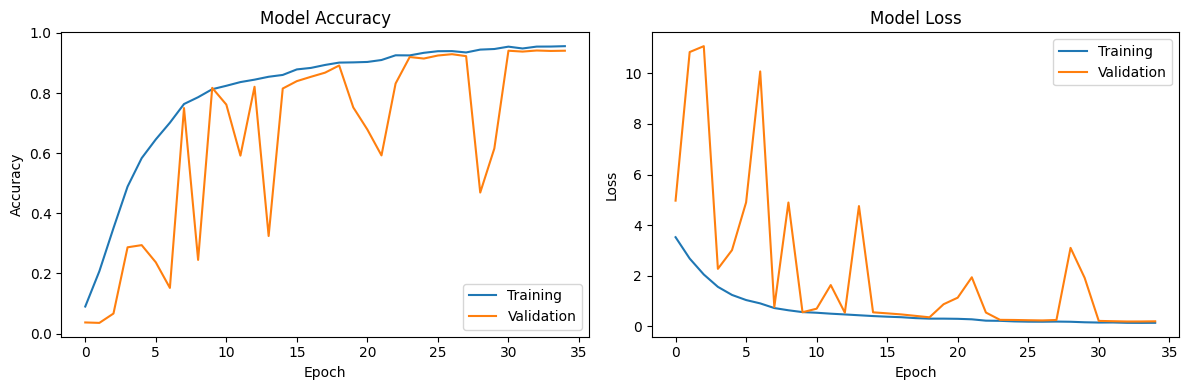

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam



IMG_SIZE = 128
BATCH_SIZE = 32
DATA_DIR = '/kaggle/input/arsl-no-background-v2/ARSL-No-BackGround-V2'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    validation_split=0.2
)
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = train_generator.num_classes
print(f"Classes: {num_classes}")

cnn_model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 2
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 3
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])



optimizer = Adam(learning_rate=0.001)
cnn_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.00001
    )
]


history = cnn_model.fit(
    train_generator,
    epochs=35,  
    validation_data=val_generator,
    callbacks=callbacks
)


cnn_model.save('arabic_sign_lightweight_model.h5')


val_loss, val_accuracy = cnn_model.evaluate(val_generator)
print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Validation loss: {val_loss:.4f}")


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

################################################################################################  loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('training_history_lightweight.png')
plt.show()
